In [34]:
from mne import read_epochs, set_eeg_reference
from mne.preprocessing import ICA, EOGRegression
import numpy as np
from mne.viz import plot_ica_components
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

Load and Preprocessing

In [35]:
import sys
sys.path.append('../../preprocessing')
from load_data import load_raw_to_epochs, get_channel_types

# load_raw_to_epochs('ah.bdf', True)

In [91]:
raw = read_epochs('raw_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\ah\raw_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated


Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 5902 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done 6264 out of 6264 | elapsed:    5.5s finished


Using matplotlib as 2D backend.


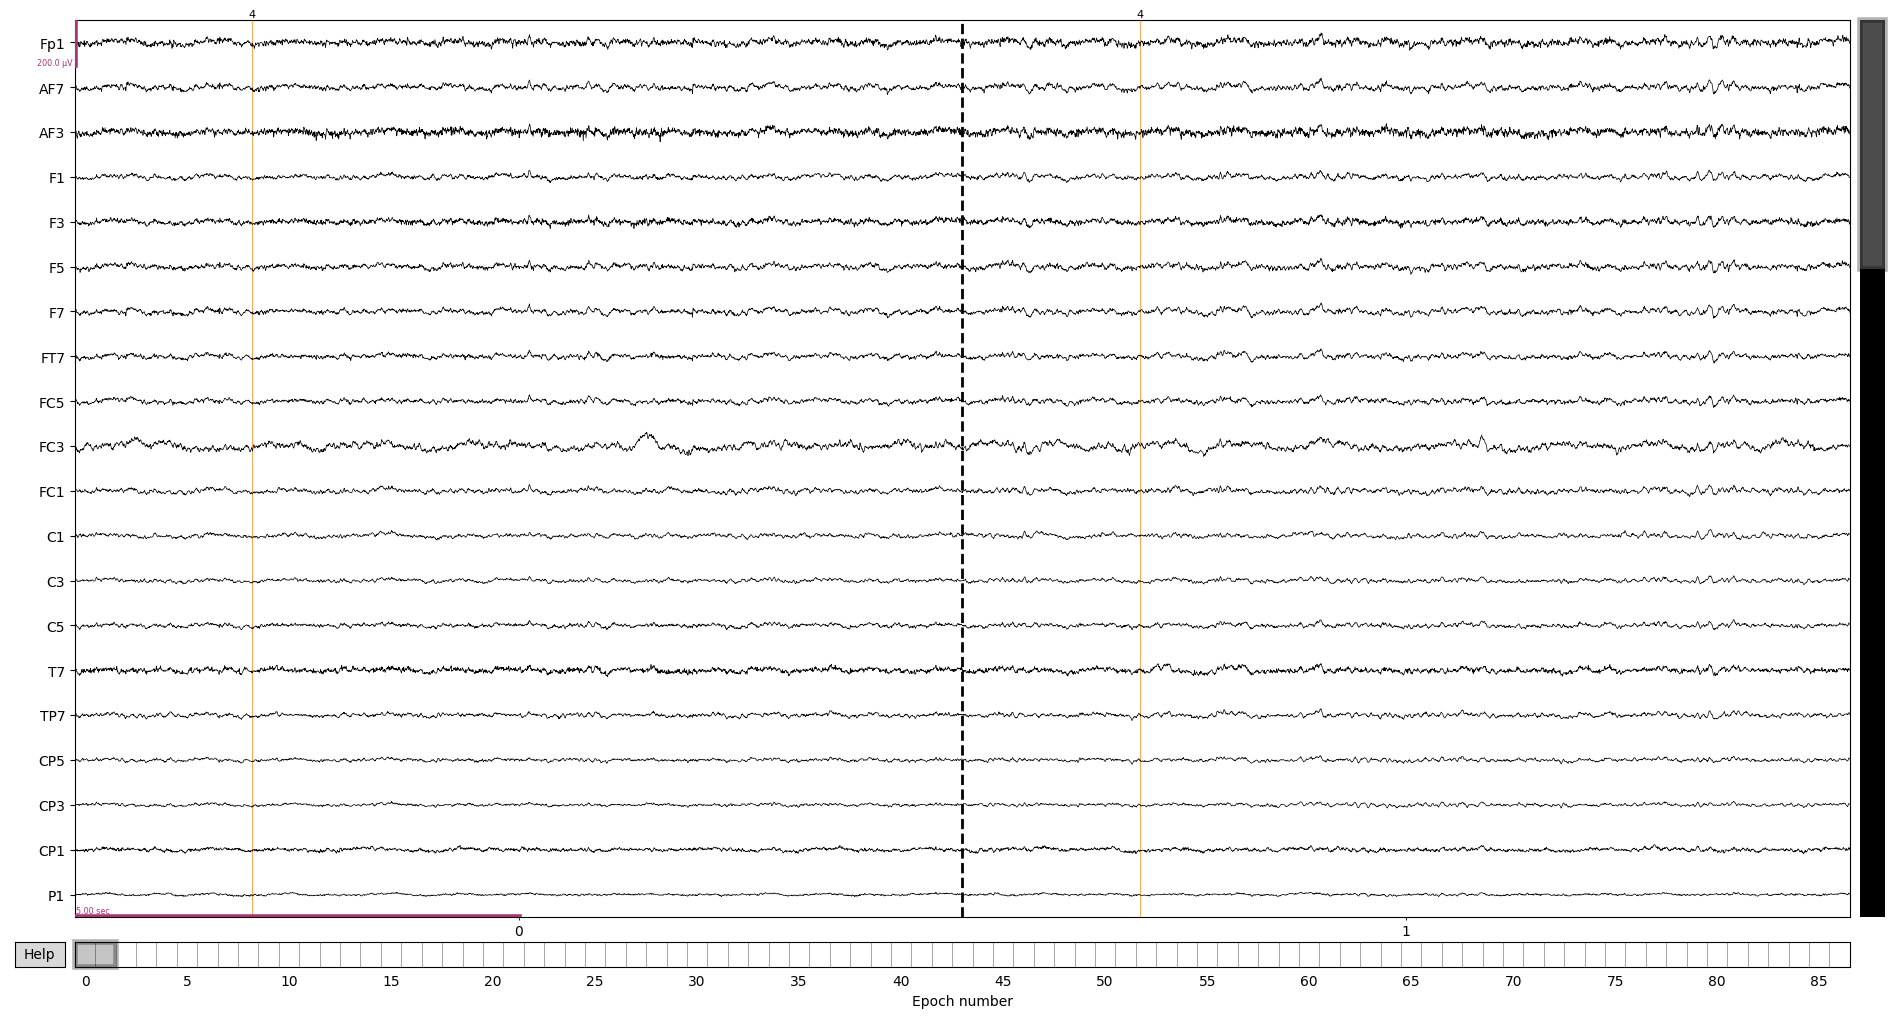

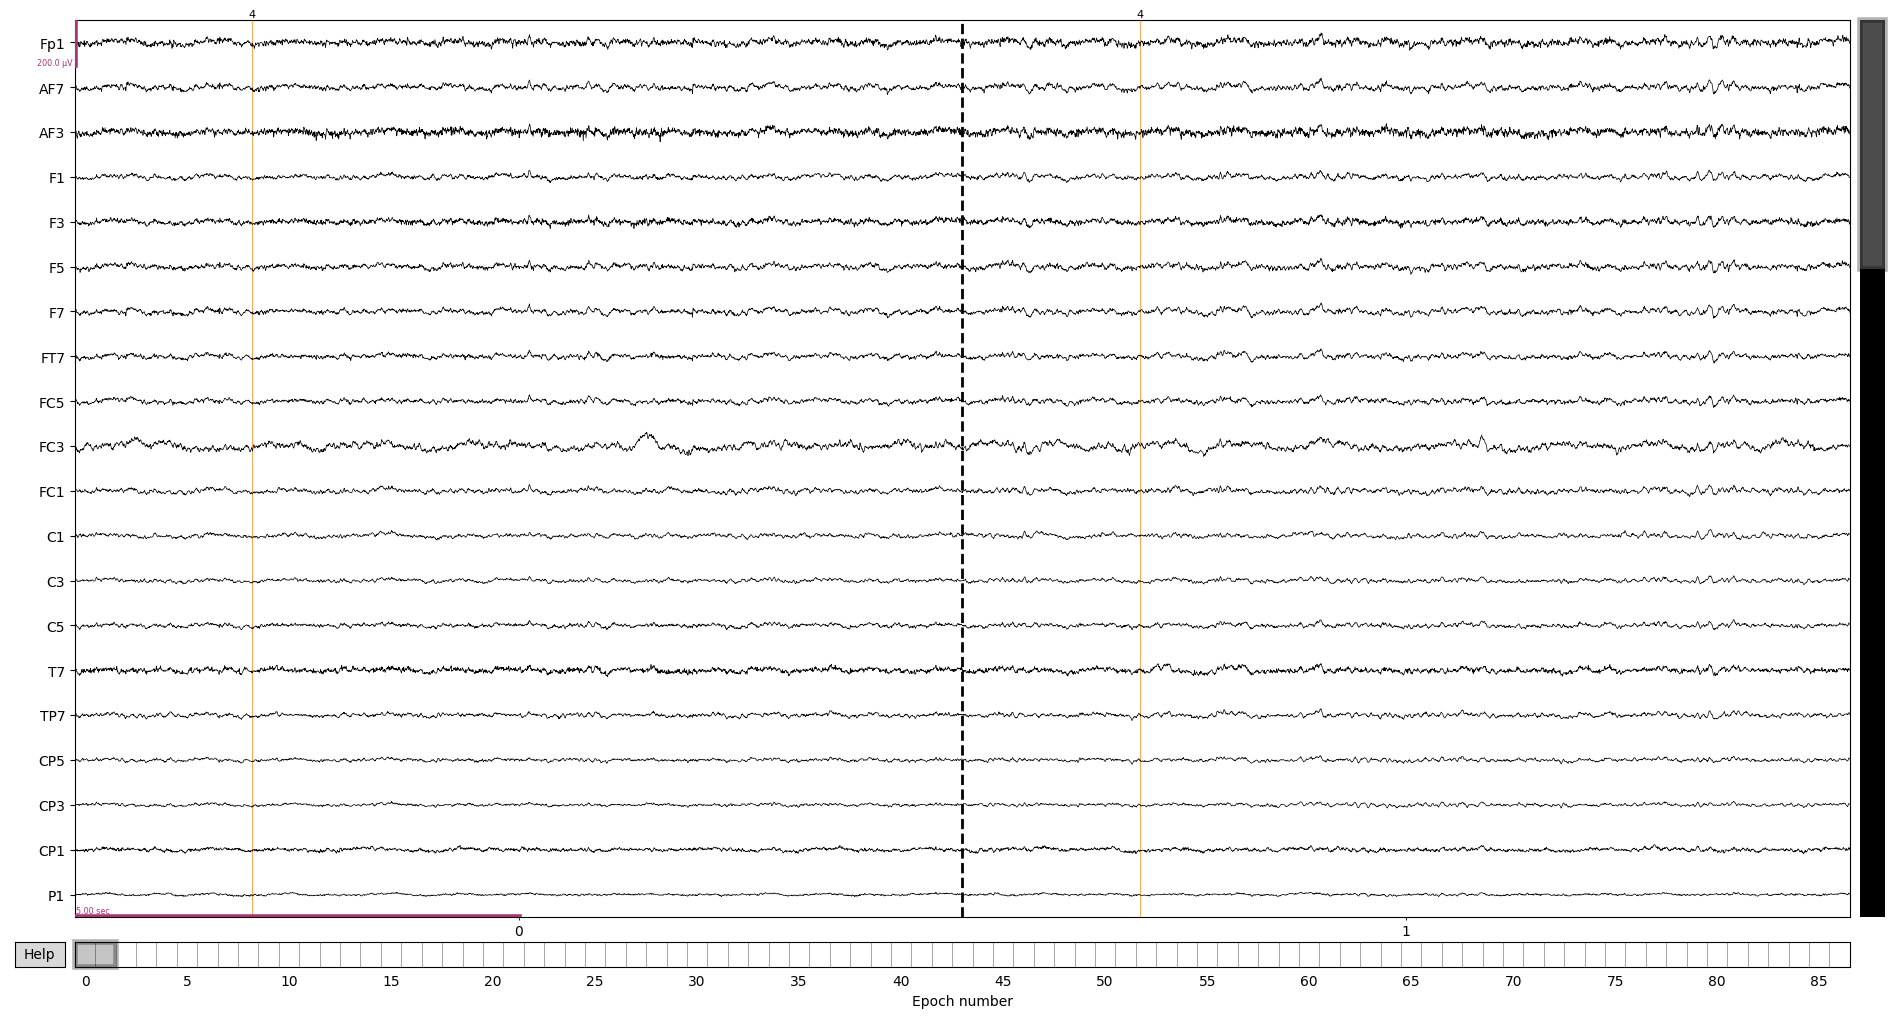

In [4]:
raw.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=2, scalings=10e-5, events=raw.events, picks=['eeg','eog'])

Marking bad chanels

In [92]:
bads = ['P10', 'T8', 'AF3', 'O2', 'AF4', 'P9', 'Fpz', 'FT8', 'P10', 'Iz', 'O1','PO7', 'Oz']
raw.info['bads'] = bads

Referencing

In [93]:
referenced = set_eeg_reference(raw,ref_channels='average')[0]
del raw

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


set channel types

In [94]:
referenced.set_channel_types(get_channel_types())

<EpochsFIF |  87 events (all good), -2 - 7.99902 sec, baseline off, ~496.3 MB, data loaded,
 'r_pinch': 18
 'r_stop': 19
 'left': 18
 'right': 18
 'rest': 14>

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 2060 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 5540 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 5568 out of 5568 | elapsed:    6.9s finished


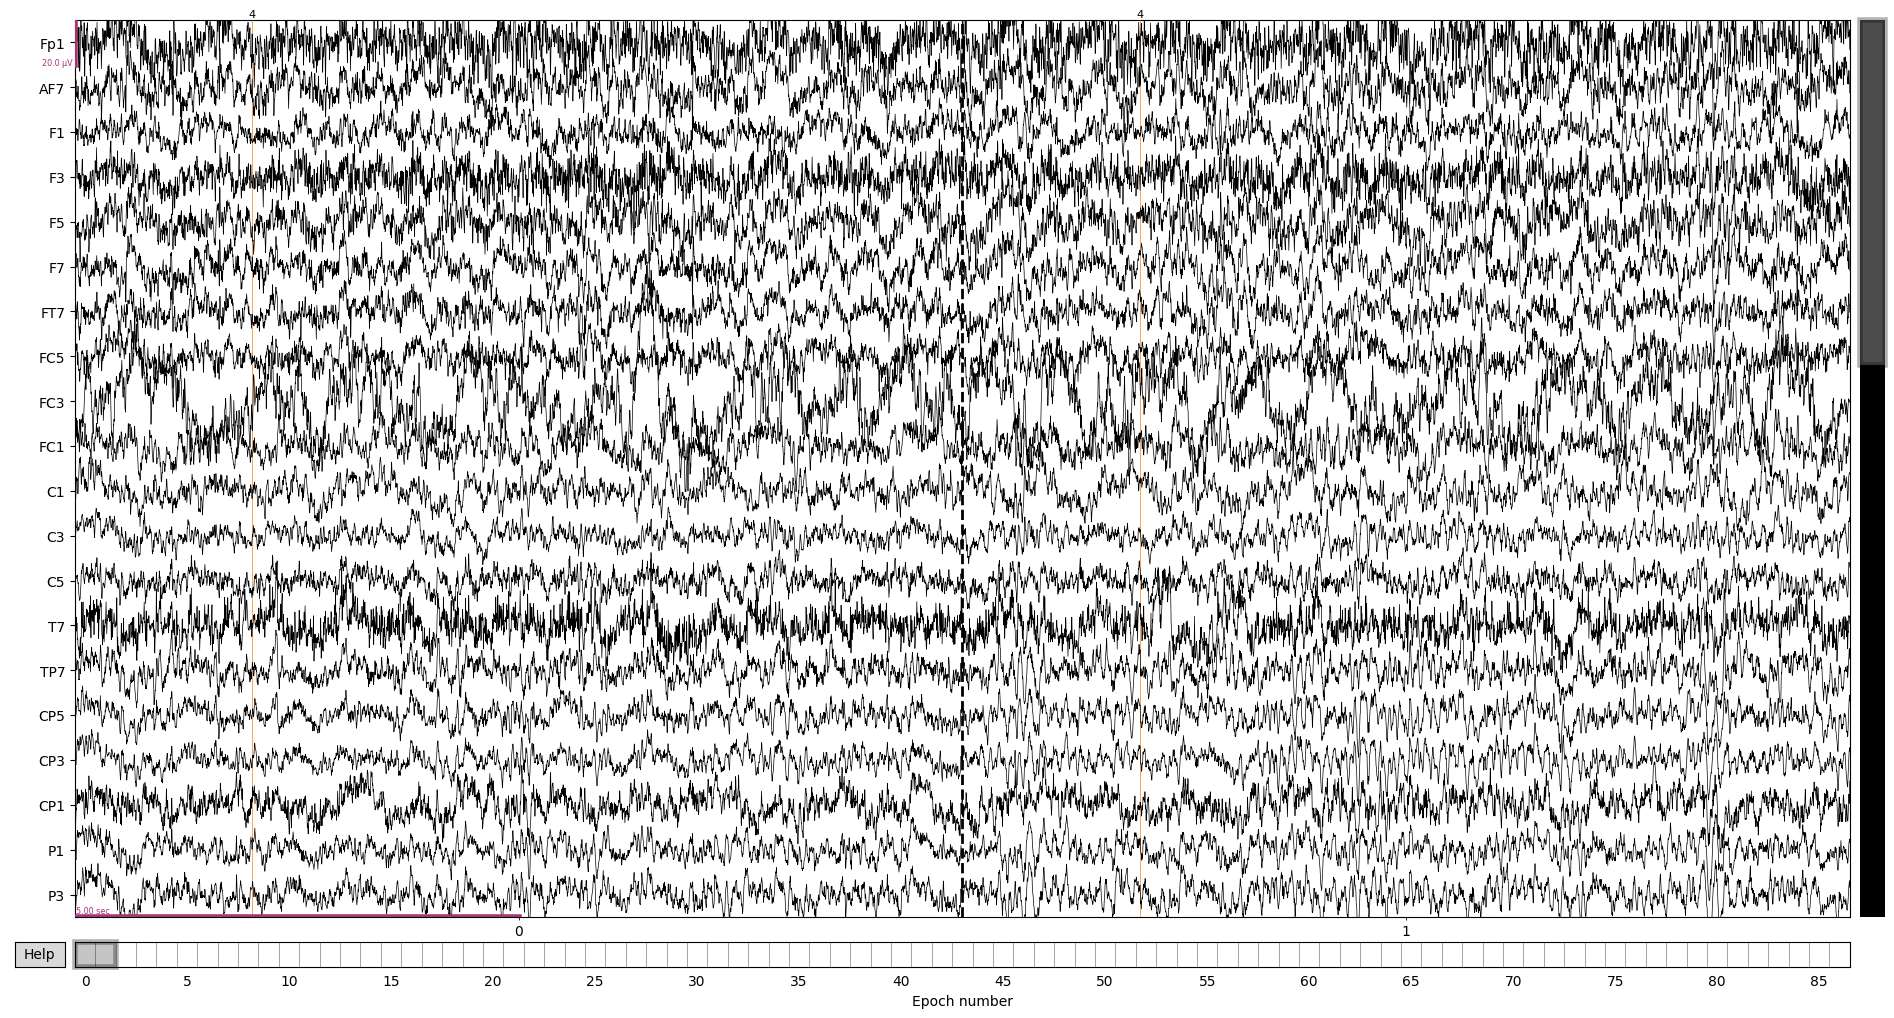

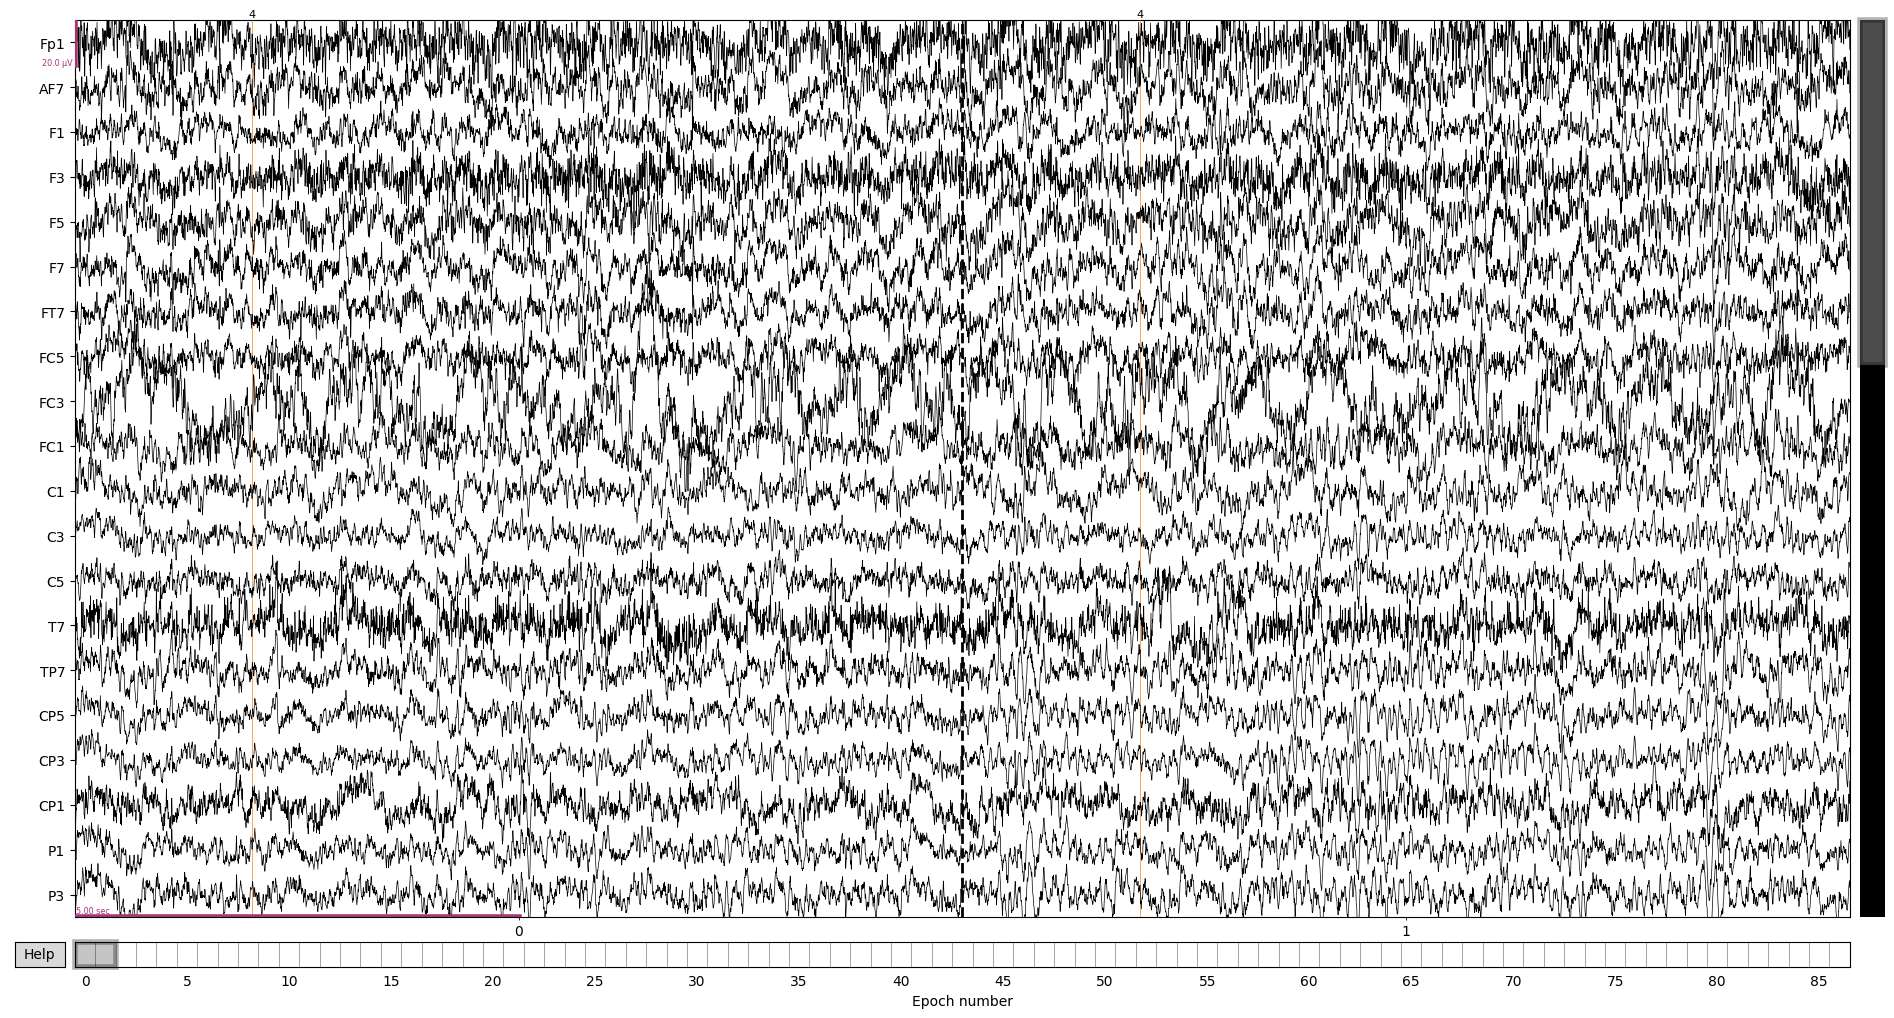

In [96]:
referenced.copy().filter(1,120, n_jobs=4).plot(n_channels=20, n_epochs=2, scalings=10e-6, events=referenced.events, picks=['eeg','eog'])

In [97]:
referenced.save('referenced_epo.fif', overwrite=True)
del referenced

Overwriting existing file.


REMOVE ARTIFACTS


In [111]:
epochs = read_epochs('referenced_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\ah\referenced_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


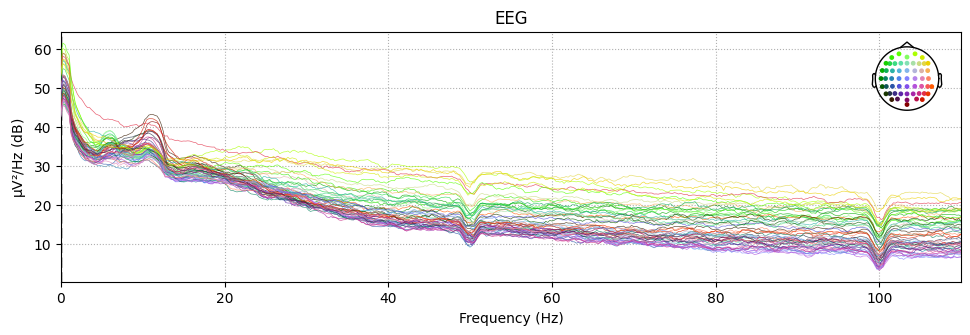

In [42]:
epochs['left'].plot_psd(fmax=110, tmin=0, tmax=4)

Remove EOG by regression

No projector specified for this dataset. Please consider the method self.add_proj.


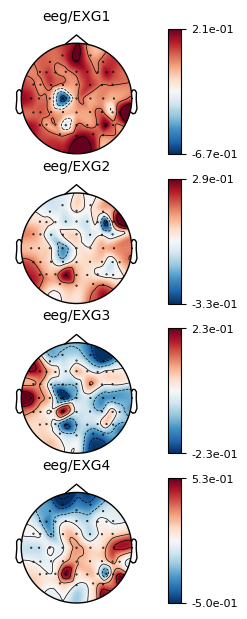

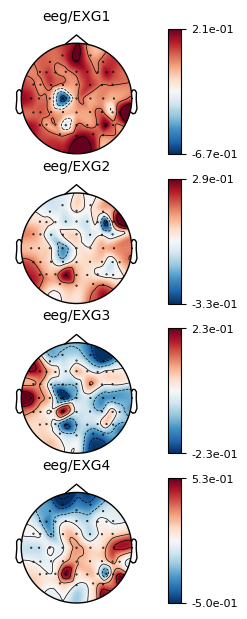

In [112]:
regressor = EOGRegression(
    picks='eeg', picks_artifact=['EXG1','EXG2','EXG3','EXG4']).fit(epochs)
regressor.plot()

In [113]:
epochs = regressor.apply(epochs)

No projector specified for this dataset. Please consider the method self.add_proj.


ICA

In [114]:
filtered = epochs.copy().filter(1,120, n_jobs=4).crop(-1,2)
ica = ICA(n_components=10, method='picard')
ica.fit(filtered)


Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 2060 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 5540 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done 5568 out of 5568 | elapsed:    7.6s finished


Fitting ICA to data using 52 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 7.9s.


<ICA | epochs decomposition, method: picard (fit in 29 iterations on 267351 samples), 10 ICA components (52 PCA components available), channel types: eeg, no sources marked for exclusion>

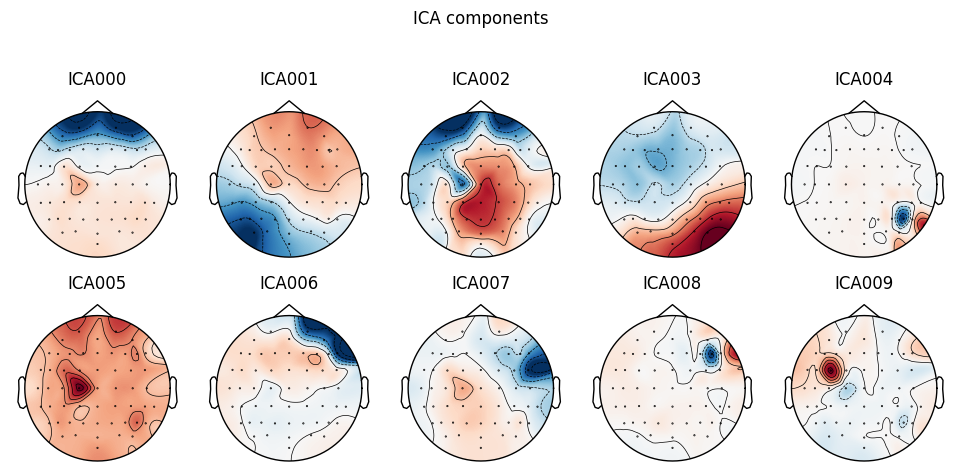

[<MNEFigure size 975x496 with 10 Axes>]

In [71]:
plot_ica_components(ica)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection i

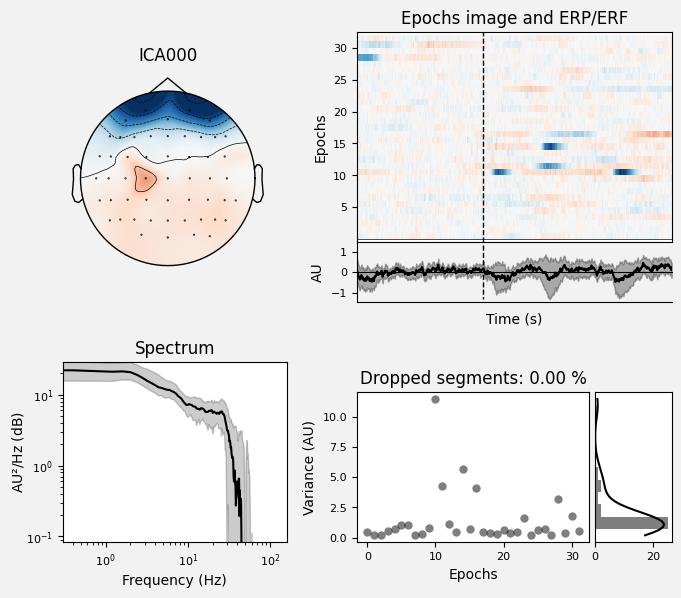

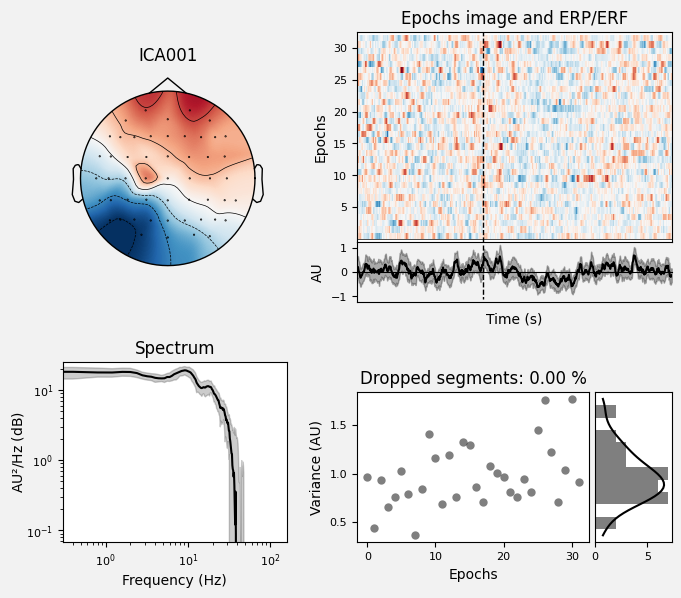

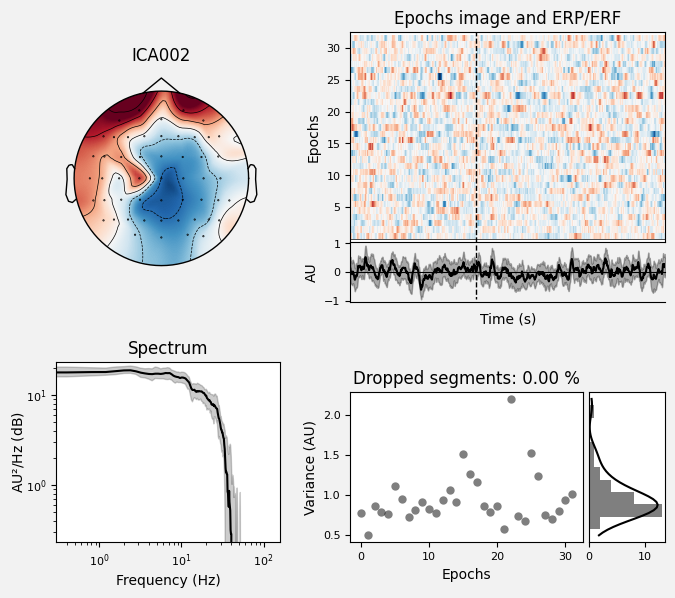

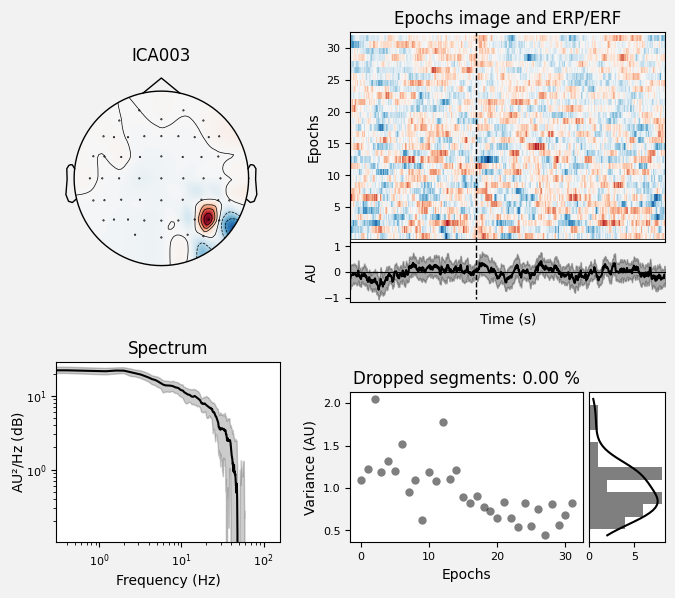

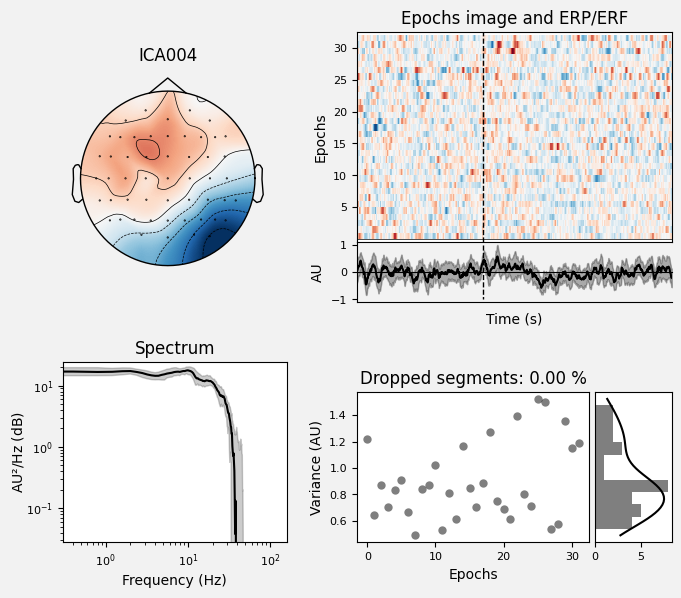

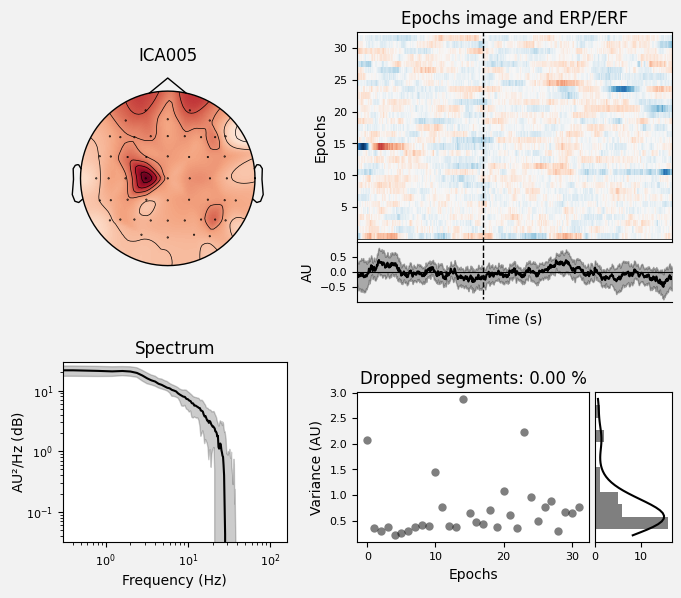

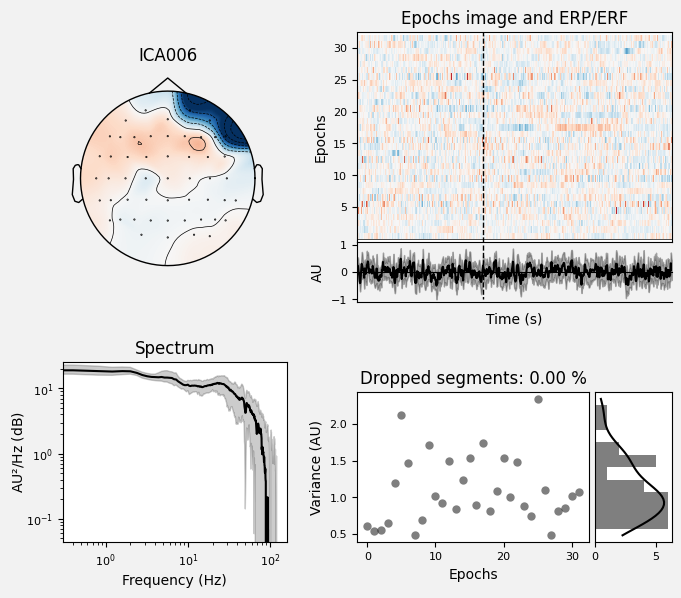

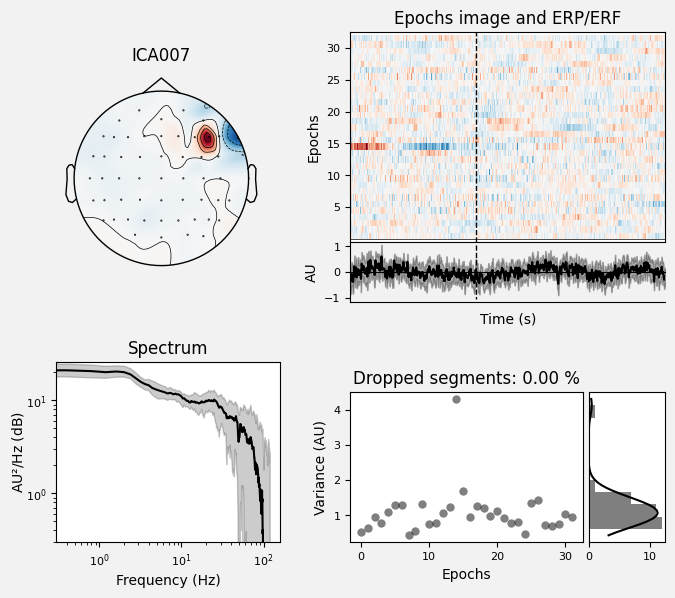

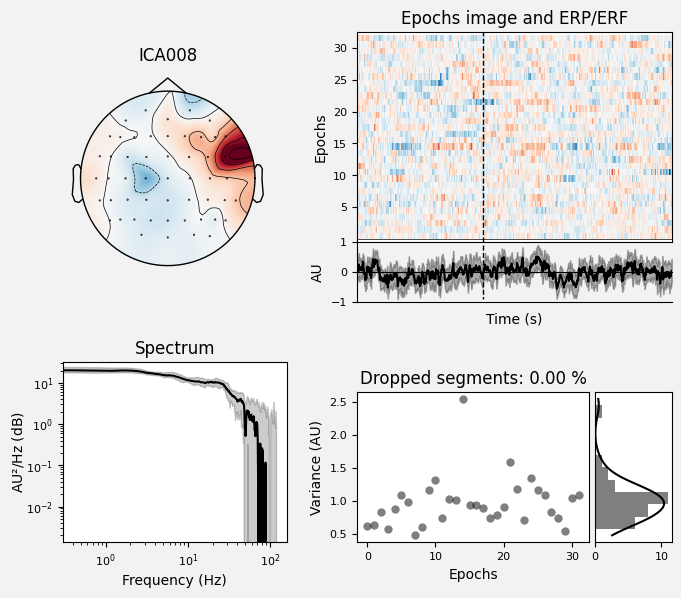

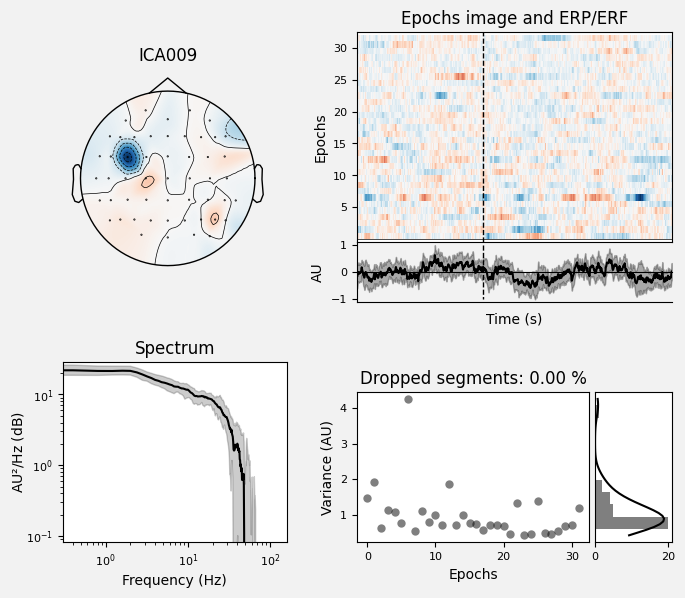

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [102]:
ica.plot_properties(
    epochs['left','rest'].copy().filter(1,120, verbose=False).crop(-1,1.5), 
    picks = [0,1,2,3,4,5,6,7,8,9], 
    log_scale = True,
    psd_args = dict(fmax=120))

In [103]:
eog_indices, eog_scores = ica.find_bads_eog(
    filtered['r_pinch'],
    ch_name=['EXG1','EXG2','EXG3','EXG4'], 
    measure='zscore',
    threshold=1.5)


Using EOG channels: EXG1, EXG2, EXG3, EXG4


In [104]:
eog_indices


[2, 0, 3, 7, 9, 8]

In [105]:
ecg_indices, icg_scores = ica.find_bads_ecg(filtered['r_pinch'], threshold=0.25)


C:\Users\Alberto\AppData\Local\Temp\ipykernel_13464\1950003828.py:1: RuntimeWarning: More than one ECG channel found. Using only EXG1.
  ecg_indices, icg_scores = ica.find_bads_ecg(filtered['r_pinch'], threshold=0.25)


In [106]:
ecg_indices

[1, 2, 0]

In [77]:
exclude = eog_indices + ecg_indices
np.unique(exclude)

array([0, 1, 2, 4, 7, 8, 9], dtype=int64)

In [115]:
ica.apply(epochs, exclude=[0,1,2,3,4,5,6,7,8,9])

Applying ICA to Epochs instance
    Transforming to ICA space (10 components)
    Zeroing out 10 ICA components
    Projecting back using 52 PCA components


<EpochsFIF |  87 events (all good), -2 - 7.99902 sec, baseline off, ~496.3 MB, data loaded,
 'r_pinch': 18
 'r_stop': 19
 'left': 18
 'right': 18
 'rest': 14>

In [116]:
epochs.save('ica_epo.fif', overwrite=True)

Overwriting existing file.


In [117]:
# epochs.info['bads'] += ['P10', 'T8', 'AF3', 'O2', 'AF4', 'P9', 'Fpz', 'FT8', 'P10', 'Iz', 'O1']
epochs.drop([20,3, 7, 11, 15, 18, 21, 25, 29, 35, 37, 47, 51, 53, 58, 65, 75, 79, 83, 85])
#epochs.drop([20,3, 7,18, 21, 25,  51, 53, 58, 65])

Dropped 20 epochs: 3, 7, 11, 15, 18, 20, 21, 25, 29, 35, 37, 47, 51, 53, 58, 65, 75, 79, 83, 85


<EpochsFIF |  67 events (all good), -2 - 7.99902 sec, baseline off, ~382.2 MB, data loaded,
 'r_pinch': 14
 'r_stop': 17
 'left': 12
 'right': 13
 'rest': 11>

In [118]:
epochs.save('ica_epo.fif', overwrite=True)

Overwriting existing file.
